# Goole Colab
Check this tutorial on [Google Colab](https://colab.research.google.com/github/simone-mastrogiovanni/GW_teaching_material/blob/master/DA_basics/Estimate_the_gaussian_mean.ipynb) 

# Tutorial 1: Bayesian analysis

In this notebook we are going to understand the basics of Bayesian analysis and its difference with respect to frequentist analysis.

## Working example: Estimating the mean of a Gaussian

Someone is giving us a generator of random gaussian numbers $x$. The gaussian likelihood for obtaining the sample $x$  given the mean $\mu$ and standard deviation $\sigma$ of the normal distribution is 

$$P(x|\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ 

Our aims are the following: 

* Given $\{x\}$ samples from the random generator, and knowing that $\sigma=1$, we want to estimate the mean of the normal distribution. We want to provide the estimate of the mean with the associated errors. 

* Repeat the estimation for the mean of the previous point but in presence of selection biases, i.e. we can detect (save) only the samples $x\geq-1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### The frequentist approach

In a frequentist analysis, we use the random generator and we generate $N=200$ samples $\{x\}$ (indicates a collection of samples $x$). Then we make a histogram to check if they are a gaussian distribution.

Below, I will also show what happens when you apply a selection bias.

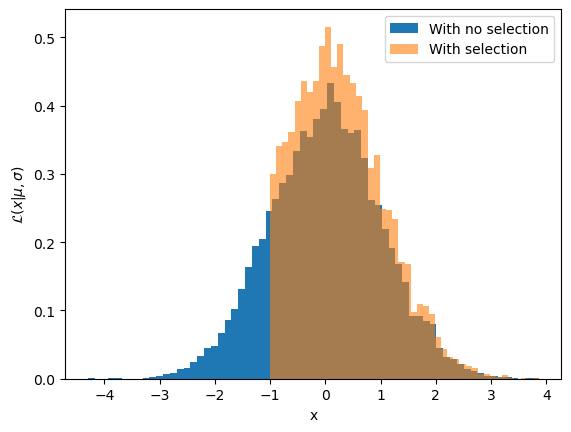

In [2]:
samples = np.random.randn(10000) #generate 200 random numbers
_=plt.hist(samples,bins='auto',density='True',label='With no selection') #histogram plot 
_=plt.hist(samples[samples>-1],bins='auto',density='True',label='With selection',alpha=0.6) #histogram plot 
plt.xlabel('x')
plt.ylabel(r'$\mathcal{L}(x|\mu,\sigma)$')
plt.legend()

In  the frequentist analysis approach, the idea is to repeat the experiment $K$ times (it generates 200 samples $K$ times). For each repetition we can estimate the mean (using the standard formula) and save it.

The mean that we estimate each time is then saved and we can use it at the end to do an histogram. The histogram of the estimated means represents our belief on the value of the mean. By using it, we can define an average error for the mean and its credible intervals.


From our experiments, mean =4.720168e-05 +/- 7.077151e-02


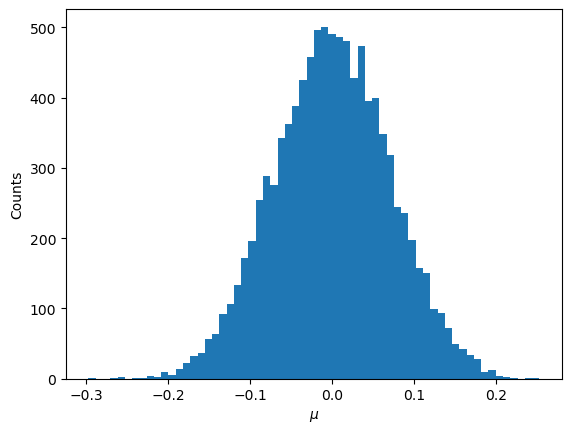

In [3]:
mu_recovered = [] #save at each experiment the value of the mean
N_repetition = 10000 #number of experiments
N_samples = 200 #for x

# Loop over my repeated experiment
for i in range(N_repetition):
    samples = np.random.randn(N_samples) 
    mu_recovered.append(np.mean(samples))
    
mu_recovered = np.array(mu_recovered) #convert into a table 

_ = plt.hist(mu_recovered,bins='auto') #histogram plot 
plt.xlabel('x')
plt.xlabel('$\mu$')
plt.ylabel('Counts')

print('From our experiments, mean ={:e} +/- {:e}'
      .format(np.mean(mu_recovered),np.std(mu_recovered)))

**Remarks:**

Note that everytime that you run your experiment, you get a different value of $\mu$ and this is normal, since we are working with a finite number of samples. 

**Challenge: **

What happens to the value of the mean and its error when you increase the number of samples? Try to make a log-log plot plotting on the $x$ axis the number of samples and on the $y$ axis the standard deviation estimated for the mean. Do you find any familiar trend? Explain it. 

### The Bayesian Approach

The Bayesian approach does not focus on the possibility of ''repeating'' and experiment. Instead it focuses on discovering all the possible values of $\mu$ that could have generated the data set $\{x\}$ that we are observing. So the Bayesian approach is an optimal approach when we want to provide errors for an experiment that is providing just one data set.

**The Bayes Theorem:**

According to the rule of probability,  
$$p(a,b)=p(a|b)p(b)$$
but also $$p(a,b)=p(b|a)p(a)$$

Thus $$p(a,b)= p(a|b)p(b)=p(b|a)p(a)$$

$$ \Leftrightarrow p(a|b)=\frac{p(b|a)p(a)}{p(b)} $$

In addition, we can write $p(b)$ as following : $$ p(b)=\int p(b|a)p(a) da $$

We define $p(a|b)$ as a probability density function (PDF).
Therefore
$$\int p(a|b) da=\frac{\int p(b|a)p(a) da}{\int p(b|a)p(a) da} =1$$

## 3. Bayesian approach

In the Bayesian approach, both your samples $\{x\}$ and $\mu$ are statistical variables. Hence their probability to appear can be characterized with a probability density function $p(\{x\},\mu)$. 

When we say that we want to measure $\mu$, we are actually saying that we want to compute $p(\mu|\{x\})$ (i.e. the probability of having a mean $\mu$ given the observation of your data \{$x$\} from GW).

We can use the Bayes theorem to compute this probability :

$$p(\mu | \{x\}) = \frac{p(\{x\}|\mu) p(\mu)}{p(\{x\})}$$

Here 

* $p(\mu|\{x\})$ is a **posterior**. It is what we want to know. 

* $p(\{x\})$ is a **normalization factor** (considered as a constant for now);

* $p(\{x\}|\mu)$ is called **likelihood**. Basically, it is the probability of obtaining $\{x\}$ from a gaussian distribution with a fixed value of $\mu$ (obtained thanks to data);

* $p(\mu)$ is a **prior**. It quantifies how much you believe, before looking at the data, that $\mu$ has indeed the value you choosed (constant taken from theory or models, so independant of data). For instance, it can be about the luminosity distance or the maximum  detectable mass for a black hole. 

**Remarks :** 

For infinite number of samples, both bayesian and frequency analysis reproduce the same result. 

Note that here I am using $\{x\}$ to indicate a collection of samples $x$. Then :
$$p(\{x\}|\mu)=\prod_{i=1}^N p(x_i|\mu)=\prod_{i=1}^N \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$$

Text(0, 0.5, 'PDF p($\\mu$|{x})')

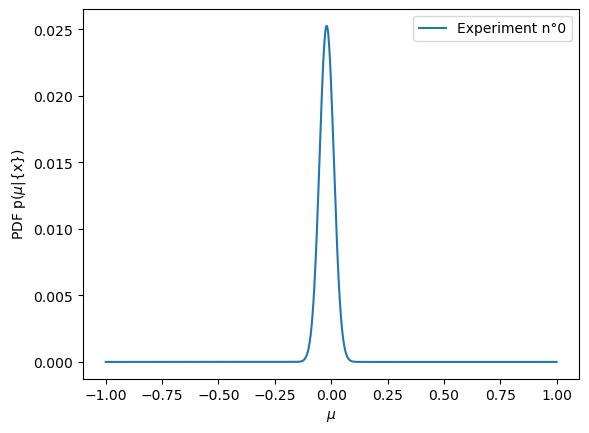

In [4]:
"""For one experiment"""

N_samples = 1000
samples = np.random.randn(N_samples) #create {x}

mu_array=np.linspace(-1,1,1000)#defines a standard table 

mu_prior = np.ones_like(mu_array) #defines p(mu) table 

mu_posterior=np.zeros_like(mu_array) #creates p(mu|{x}) table 

for i in range(len(mu_array)):
    log_mu_posterior = np.sum(-0.5*(mu_array[i]-samples)**2)
    mu_posterior[i] = np.exp(log_mu_posterior)*mu_prior[i] #calculates p({x}|mu)*p(mu)
    
mu_posterior/=mu_posterior.sum() #normalizes by p({x}), we eventually obtain p(mu|{x})
    
plt.plot(mu_array,mu_posterior,label='Experiment n°{:d}'.format(0),alpha=1) 
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('PDF p($\mu$|{x})') 

Text(0, 0.5, 'PDF p($\\mu$|{x})')

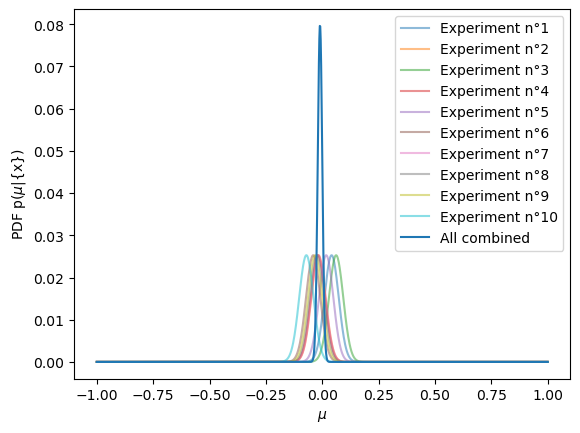

In [5]:
"""For several experiments to improve the accuracy of the mean"""
N_samples = 1000
N_repetition = 10 #number of experiment 

mu_array=np.linspace(-1,1,1000) #define a standard table

mu_prior = np.ones_like(mu_array)*(mu_array+1)**2 #define p(mu) table 

mu_posterior=np.zeros_like(mu_array) #create p(mu|{x}) table for one experiment
mu_posterior_total=np.ones_like(mu_array) #combine p(mu|{x}) table from every experiment

for j in range(N_repetition): #for each experiment 

    samples = np.random.randn(N_samples) #create {x} table independantly 

    for i in range(len(mu_array)):
        log_mu_posterior = np.sum(-0.5*(mu_array[i]-samples)**2)
        mu_posterior[i] = np.exp(log_mu_posterior)*mu_prior[i] #calculate p({x}|mu)*p(mu)
    
    mu_posterior/=mu_posterior.sum() #normalize by p({x}), we eventually obtain p(mu|{x})
    plt.plot(mu_array,mu_posterior,label='Experiment n°{:d}'.format(j+1),alpha=0.5)#plot of each experiment  
    
    mu_posterior_total*=mu_posterior
    mu_posterior_total/=mu_posterior_total.sum() 

plt.plot(mu_array,mu_posterior_total,label='All combined')    
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel(r'PDF p($\mu$|{x})') #NOT NORMALIZED CORRECTLY

## 4. The selection effect

We are going to see a new important implication for Bayesian analysis, the **selection effect**. This will be very important because you will need it for our GWs study. 

**Let's try to understand what is a selection effect with an example:**

You want to estimate with a Bayesian analysis the mean of a gaussian random process, as before. As before, let's assume that your gaussian process has $\mu=0$ and $\sigma=1$. However, this time your experiment is able to register only values of $x>0$ (this is a threshold). Basically, this means that the only values of $x$ that you can register are the ones which are greater than $0.5$ --> selection effect. 

Then the likelihood $\mathcal{L}(x|\mu) = p(x|\mu)$ of observing a value of $x$ should be renormalized by the number of $x$ that you can effectively see.


**Without selection effect**:

$$\mathcal{L}(x|\mu) = \frac{\rm{exp}[-(x-\mu)^2/(2\sigma^2)]}{\int_{-\infty}^{\infty} \rm{exp}[-(x-\mu)^2/(2\sigma^2)] dx} = \frac{1}{\sqrt{2\pi} \sigma}  \rm{exp}[-(x-\mu)^2/(2\sigma^2)]$$

Note that before the selection effect, the denominator is the normalization of the gaussian distribution which is equal to a known constant. 

**With selection effect**:

$$\mathcal{L}(x|\mu) =\frac{\rm{exp}[-(x-\mu)^2/(2\sigma^2)]}{\int^{\infty}_{x_{thr}} \rm{exp}[-(x-\mu)^2/(2\sigma^2)] dx} = \frac{\rm{exp}[-(x-\mu)^2/(2\sigma^2)]}{I(\mu,x_{thr})}$$

Because the range of samples is restricted, the normalization at the denominator is equal to an unknown constant called $I(\mu,x_{thr})$. So the denominator has become a function of $\mu$ and you need to resolve it. 

In [6]:
def selection_function(x_thr,mu,sigma=1):
    f_gaussian = lambda x: np.exp(-((x-mu)**2)/(2.0*sigma**2)) 
    return quad(f_gaussian,x_thr,30)[0]

Text(0, 0.5, 'PDF p($\\mu$|{x})')

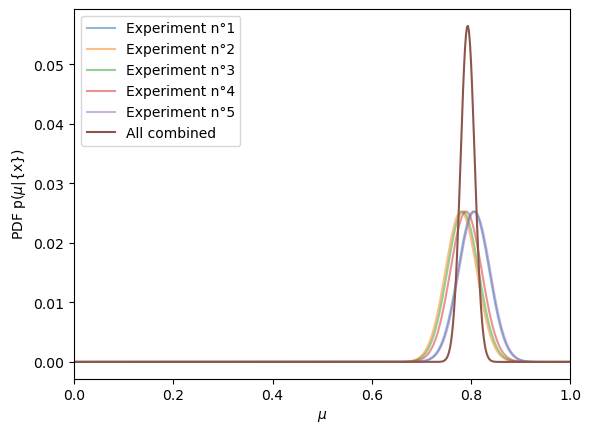

In [7]:
"""Likelihood without selection effect"""
N_samples = 1000
x_thr=0 #define the threshold for the likelihood selection effect
N_repetition = 5 #number of experiment 

mu_array=np.linspace(-1,1,1000) #define a standard table

mu_posterior=np.zeros_like(mu_array) #create p(mu|{x}) table for one experiment
mu_prior = np.ones_like(mu_array)*(mu_array+1)**2 #define p(mu) table 
mu_posterior_total=np.ones_like(mu_array) #combine p(mu|{x}) table from every experiment

for j in range(N_repetition): #for each experiment 
    samples=[]
    while len(samples)<N_samples:
        x=np.random.randn()
        if x>=x_thr: #x belongs to [x_thr;infinity[ 
            samples.append(x)
    samples=np.array(samples) #create {x} table independantly 
    
    for i in range(len(mu_array)):
        log_mu_posterior = np.sum(-0.5*(mu_array[i]-samples)**2) #without selection effect
        mu_posterior[i] = np.exp(log_mu_posterior)*mu_prior[i] #calculate p({x}|mu)*p(mu)
    
    mu_posterior/=mu_posterior.sum() #normalize by p({x}), we eventually obtain p(mu|{x})
    plt.plot(mu_array,mu_posterior,label='Experiment n°{:d}'.format(j+1),alpha=0.5)
    
    mu_posterior_total*=mu_posterior
    mu_posterior_total/=mu_posterior_total.sum()

plt.plot(mu_array,mu_posterior_total,label='All combined')    
plt.legend()
plt.xlim(0,1)   
plt.xlabel(r'$\mu$')
plt.ylabel(r'PDF p($\mu$|{x})') #NOT NORMALIZED CORRECTLY

Text(0, 0.5, 'PDF p($\\mu$|{x})')

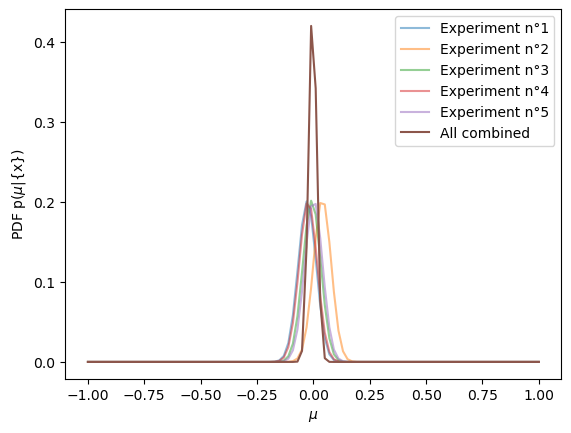

In [8]:
"""Likelihood with selection effect"""
N_samples = 1000
x_thr=-1 #define the threshold for the likelihood selection effect
N_repetition = 5 #number of experiment 

mu_array=np.linspace(-1,1,100) #define a standard table

mu_posterior=np.zeros_like(mu_array) #create p(mu|{x}) table for one experiment
mu_prior = np.ones_like(mu_array) #define p(mu) table 
mu_posterior_total=np.ones_like(mu_array) #combine p(mu|{x}) table from every experiment

I=np.ones_like(mu_array) #define the table for the selection effect terme (denominator)

for i in range(len(mu_array)): #compute the normalization after selection effect
    I[i]=selection_function(x_thr,mu_array[i])
    
    
for j in range(N_repetition):
    
    samples=[]
    while len(samples)<N_samples:
        x=np.random.randn()
        if x>=x_thr: #x belongs to [x_thr;infinity[ 
            samples.append(x)
    samples=np.array(samples) #create {x} table independantly 
    
    for i in range(len(mu_array)):
        log_mu_posterior = np.sum(-0.5*(mu_array[i]-samples)**2)-N_samples*np.log(I[i]) #with selection effect
        mu_posterior[i] = log_mu_posterior # 
    
    mu_posterior-=mu_posterior.max()
    mu_posterior=np.exp(mu_posterior)*mu_prior[i] #calculate p({x}|mu)*p(mu)
    
    mu_posterior/=mu_posterior.sum() #normalize by p({x}), we eventually obtain p(mu|{x})
    plt.plot(mu_array,mu_posterior,label='Experiment n°{:d}'.format(j+1),alpha=0.5)
    
    mu_posterior_total*=mu_posterior
    mu_posterior_total/=mu_posterior_total.sum()

plt.plot(mu_array,mu_posterior_total,label='All combined')    
plt.legend() 
plt.xlabel(r'$\mu$')
plt.ylabel(r'PDF p($\mu$|{x})') #NOT NORMALIZED CORRECTLY

## Challenge

Given a set of random numbers distribuited uniformly in [0,1], try to estimate the upper-bound of the uniform distribution.

**Tips:** Try to do the following steps

* Generate random numbers uniformly distribuited in [0,1]
* Write a function that returns a box likelihood between two intervals [a,b]. It must return 0 if the $x$ value is outside the interval.
* Use the Bayesian approach with the likelihood of point 2